In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

data = pd.read_csv("tiktok.csv")
print(data.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            reviewId        userName  \
0  gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...    MR LOL GAMER   
1  gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...     Dino Kljako   
2  gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...  Olivia Harding   
3  gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...         Keli We   
4  gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...    Mavis Kotoka   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a/AATXAJ...   
3  https://play-lh.googleusercontent.com/a-/AOh14...   
4  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                             content  score  thumbsUpCount  \
0                                               Good      5              0   
1  Awesome app! Too many people on it where it's ...      5              0

In [3]:
data = data.loc[:,["content","score"]] #Ambil kolom content dan score
data.shape

(307057, 2)

In [4]:
data.isnull().sum() #Cek null value

content    4
score      0
dtype: int64

In [5]:
data.dropna(inplace = True) #Hilangkan null value
data.isnull().sum()

content    0
score      0
dtype: int64

In [6]:
#Bersihkan kolom content dengan regex
stopword=set(stopwords.words('english')) #Set stopword ke Bahasa Inggris
def clean(text): #Buat fungsi untuk cleaning
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean) #apply fungsi pada kolom content

### Pie Chart ###

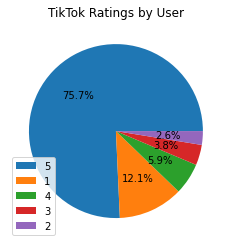

In [19]:
rating = data["score"].value_counts()
skor = rating.index
jumlah = rating.values
plt.pie(jumlah, autopct='%1.1f%%')
plt.title('TikTok Ratings by User')
plt.legend(skor, loc=3)
plt.show()

### Wordcloud All Feedback ###

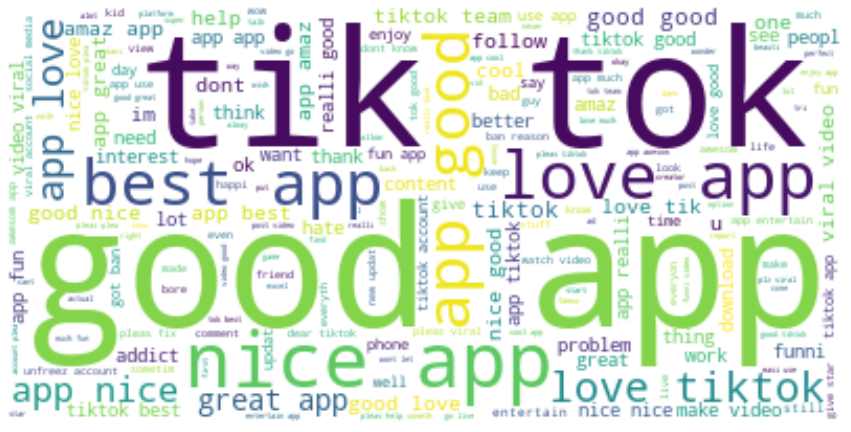

In [20]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Analysis (Positif, Negatif, Netral) ### 

In [21]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...


                                             content  Positive  Negative  \
0                                               good     1.000       0.0   
1  awesom app mani peopl easier fb girl awesom gu...     0.381       0.0   
2                                                bad     0.000       1.0   
3                                               good     1.000       0.0   
4                                       interest app     0.750       0.0   

   Neutral  
0    0.000  
1    0.619  
2    0.000  
3    0.000  
4    0.250  


### Positive Feedback Wordcloud ###

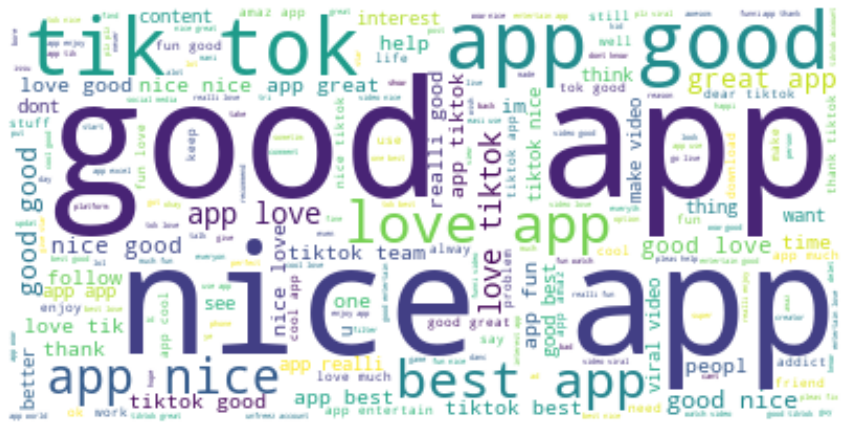

In [25]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]]) #pilih data dengan skor positif lebih tinggi
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative Feedback Wordcloud ###

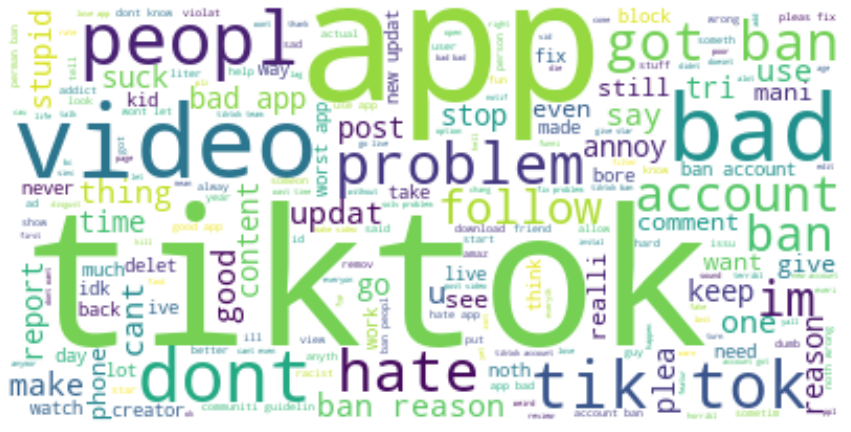

In [24]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]]) #pilih data dengan skor negatif lebih tinggi
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()